In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
try:
    import csiborgtools
except ModuleNotFoundError:
    import sys
    sys.path.append("../")
    import csiborgtools
import utils
%load_ext autoreload
%autoreload 2

import joblib
from os.path import join

In [4]:
Nsim = 9844
Nsnap = 1016

data = utils.load_processed(Nsim, Nsnap)

<IPython.core.display.Javascript object>


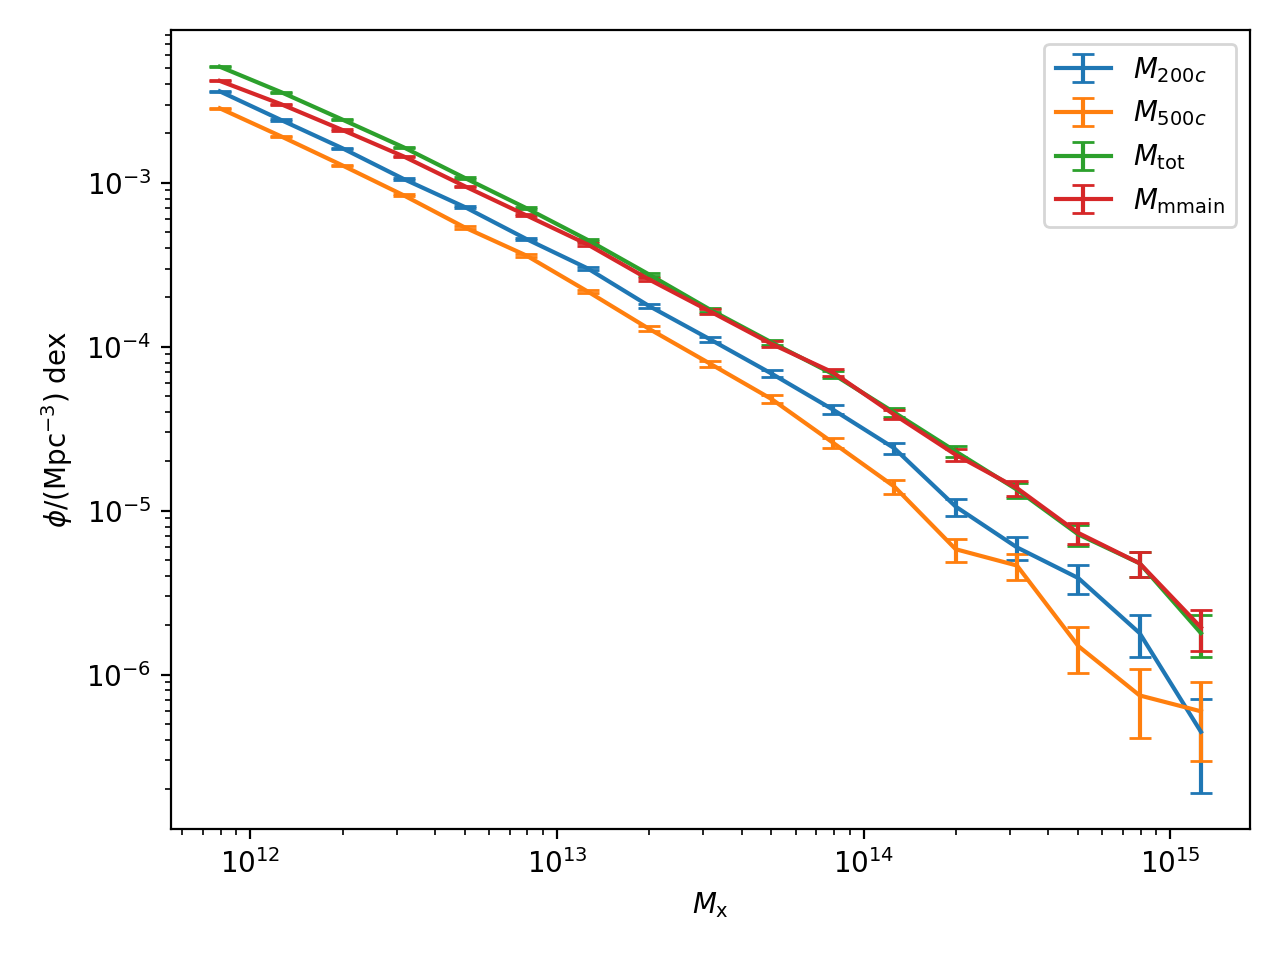

In [11]:
bins = np.arange(11.8, 15.4, 0.2)


plt.figure()
x, mu, std = csiborgtools.match.number_density(data, "m200", bins, 200, True)
plt.errorbar(x, mu, std, capsize=4, label=r"$M_{200c}$")

x, mu, std = csiborgtools.match.number_density(data, "m500", bins, 200, True)
plt.errorbar(x, mu, std, capsize=4, label=r"$M_{500c}$")

x, mu, std = csiborgtools.match.number_density(data, "totpartmass", bins, 200, True)
plt.errorbar(x, mu, std, capsize=4, label=r"$M_{\rm tot}$")

x, mu, std = csiborgtools.match.number_density(data, "mass_mmain", bins, 200, True)
plt.errorbar(x, mu, std, capsize=4, label=r"$M_{\rm mmain}$")

plt.legend()

plt.yscale("log")
plt.xscale("log")

plt.ylabel(r"$\phi / (\mathrm{Mpc}^{-3})~\mathrm{dex}$")
plt.xlabel(r"$M_{\rm x}$")
plt.tight_layout()
plt.savefig("../plots/HMF.png", dpi=450)
plt.show()

<IPython.core.display.Javascript object>


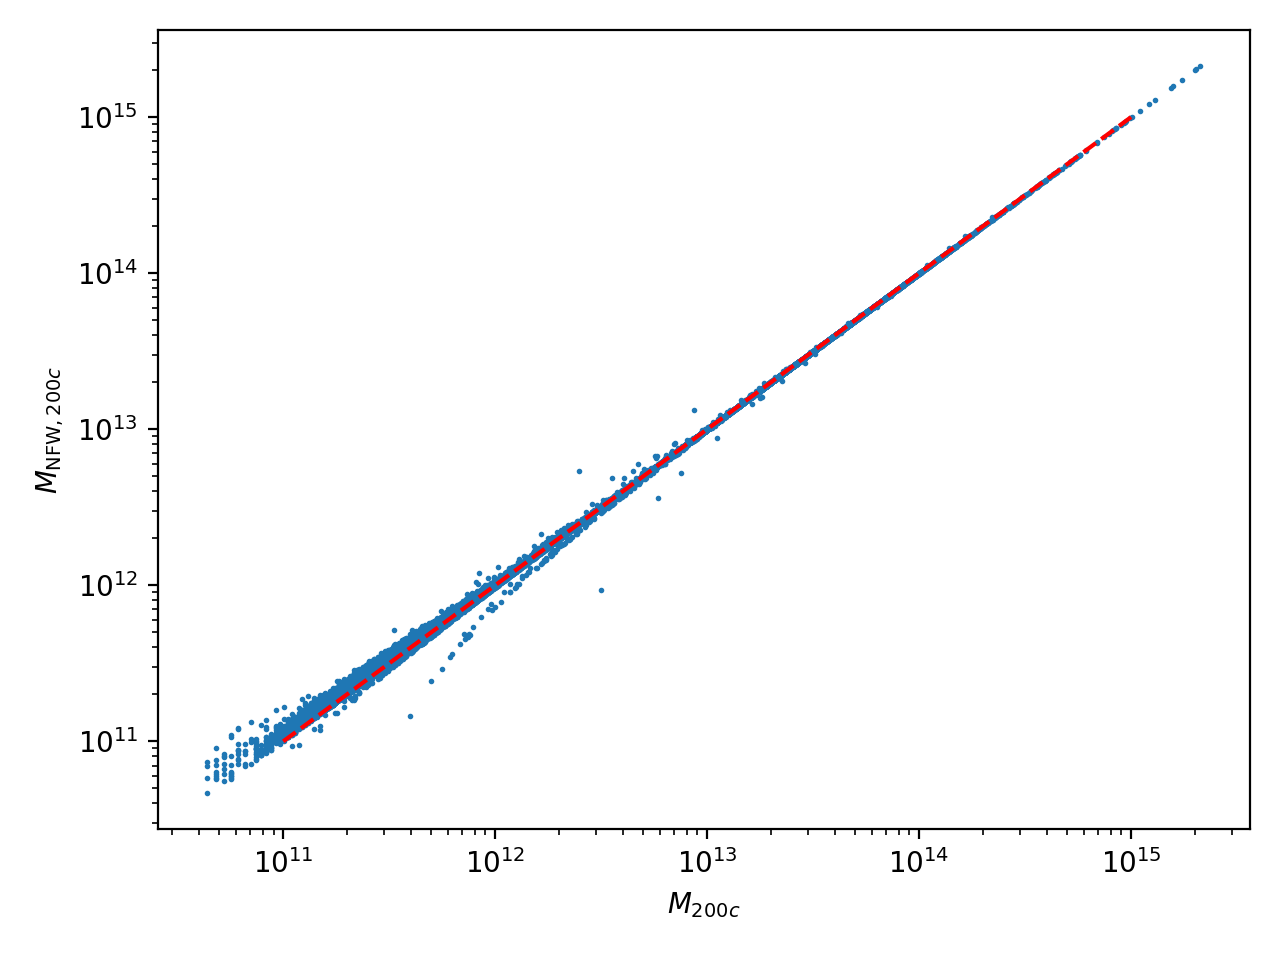

In [8]:
nfw = csiborgtools.fits.NFWProfile()
m200_nfw = nfw.enclosed_mass(data["r200"], data["Rs"], data["rho0"])



plt.figure()

plt.scatter(data["m200"], m200_nfw, s=1)
t = np.linspace(1e11, 1e15)
plt.plot(t, t, c="red", ls="--", lw=1.5)
plt.xscale("log")
plt.yscale("log")

plt.xlabel(r"$M_{200c}$")
plt.ylabel(r"$M_{\mathrm{NFW}, 200c}$")
plt.tight_layout()
plt.savefig("../plots/enclosed_vs_nfw.png", dpi=450)
plt.show()

<IPython.core.display.Javascript object>


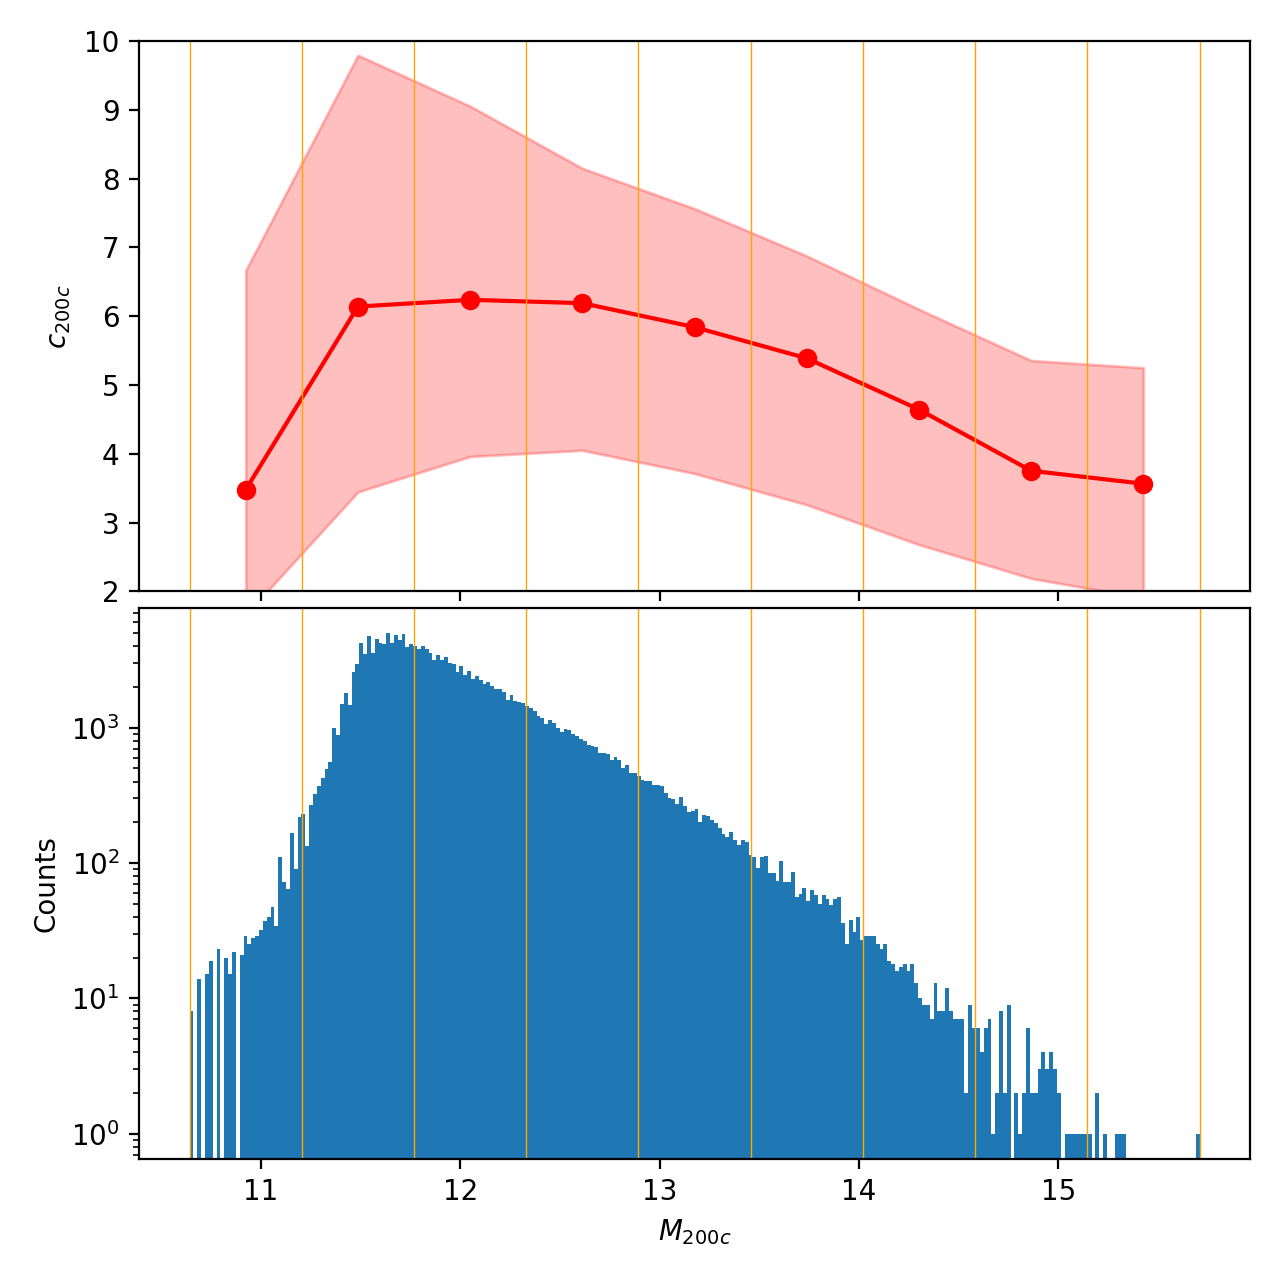

In [9]:
logm200 = np.log10(data["m200"])
conc = data["conc"]

N = 10
bins = np.linspace(logm200.min(), logm200.max(), N)
x = [0.5*(bins[i] + bins[i + 1]) for i in range(N-1)]
y = np.full((N - 1, 3), np.nan)
for i in range(N - 1):
    mask = (logm200 >= bins[i]) & (logm200 < bins[i + 1]) & np.isfinite(conc)
    y[i, :] = np.percentile(conc[mask], [14, 50, 84])


    
    
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(6.4, 6.4 * 1))
fig.subplots_adjust(hspace=0)
axs[0].plot(x, y[:, 1], c="red", marker="o")
axs[0].fill_between(x, y[:, 0], y[:, 2], color="red", alpha=0.25)
axs[1].hist(logm200, bins="auto", log=True)

for b in bins:
    for i in range(2):
        axs[i].axvline(b, c="orange", lw=0.5)

axs[0].set_ylim(2, 10)
axs[1].set_xlabel(r"$M_{200c}$")
axs[0].set_ylabel(r"$c_{200c}$")
axs[1].set_ylabel(r"Counts")

plt.tight_layout(h_pad=0)
plt.savefig("../plots/mass_concentration.png", dpi=450)
plt.show()